In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import utils
from plot import *

sns.set_style('whitegrid')

InitMatplotlib(7, 7)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
use_tex True 
font_size 7 
title_size 7


In [32]:
import pandas as pd



EXP_PATH = '../../exp-for-plot/real/ddl=search+task=48+overhead=0.20/real'

df = utils.get_dfs_from_exp(EXP_PATH)
df

/home/gcpuser/skypilot-spot-strategy/scripts/plots/utils.py:47: RuntimeWarning: Mean of empty slice.
  avg_spot_hours = spot_hours.mean()
/opt/conda/envs/sky-spot/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,trace,env,strategy,deadline_hours,task_hours,task_fraction,gap_seconds,avg_spot_hours,avg_wait_hours,num_slices,spot_fraction,cost
0,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2a_v100_1,time_sliced_by_num,56.0,48.0,0.857143,600,1.725490,1.666667,5.0,0.523810,124.269950
1,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2a_v100_1,time_sliced_by_num,56.0,48.0,0.857143,600,1.851852,1.333333,5.0,0.595238,121.186500
2,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2a_v100_1,time_sliced_by_num,56.0,48.0,0.857143,600,1.990196,1.303922,5.0,0.604167,97.187150
3,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2a_v100_1,time_sliced_by_num,56.0,48.0,0.857143,600,1.685185,1.425926,5.0,0.541667,102.310600
4,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2a_v100_1,time_sliced_by_num,56.0,48.0,0.857143,600,1.277778,1.101449,5.0,0.547619,122.554317
...,...,...,...,...,...,...,...,...,...,...,...,...
1029595,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2b_k80_1,time_sliced_by_num,64.0,48.0,0.750000,600,1.113333,1.506944,34.0,0.434896,137.922700
1029596,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2b_k80_1,time_sliced_by_num,64.0,48.0,0.750000,600,0.416667,31.583333,34.0,0.013021,167.790000
1029597,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2b_k80_1,time_sliced_by_num,64.0,48.0,0.750000,600,0.416667,21.055556,34.0,0.013021,167.790000
1029598,../../exp-for-plot/real/ddl=search+task=48+ove...,us-west-2b_k80_1,time_sliced_by_num,64.0,48.0,0.750000,600,2.250000,2.500000,34.0,0.492188,115.316583


In [33]:
df.drop_duplicates(inplace=True)

greedy_df = df[df['strategy'] == 'strawman']
limit_deficit_df = df[df['strategy'] == 'rc_cr_threshold']

In [34]:
sliced_df = df[df['strategy'] == 'time_sliced_by_num']
best_sliced_df = sliced_df.loc[sliced_df.groupby(['env', 'deadline_hours', 'trace'])['cost'].idxmin()]
mean_sliced = sliced_df[['env', 'deadline_hours', 'num_slices', 'cost']].groupby(['env', 'deadline_hours', 'num_slices']).mean().reset_index()
mean_sliced_best = mean_sliced.loc[mean_sliced.groupby(['env', 'deadline_hours'])['cost'].idxmin()]
best_sliced_by_env = pd.merge(mean_sliced_best, sliced_df, on=['env', 'deadline_hours', 'num_slices'], how='left', suffixes=('_mean_best', ''))

optimal_df = df[df['strategy'] == 'ideal_ilp_overhead']


In [35]:
best_sliced_by_env

,env,deadline_hours,num_slices,cost_mean_best,trace,strategy,task_hours,task_fraction,gap_seconds,avg_spot_hours,avg_wait_hours,spot_fraction,cost
0,us-west-2a_k80_1,52.0,4.0,66.613781,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.923077,600,7.000000,0.500000,0.942308,55.148233
1,us-west-2a_k80_1,52.0,4.0,66.613781,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.923077,600,4.041667,0.318182,0.932692,60.875483
2,us-west-2a_k80_1,52.0,4.0,66.613781,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.923077,600,7.285714,0.166667,0.980769,48.168450
3,us-west-2a_k80_1,52.0,4.0,66.613781,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.923077,600,2.774510,0.302083,0.907051,94.404617
4,us-west-2a_k80_1,52.0,4.0,66.613781,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.923077,600,8.527778,0.166667,0.983974,47.681900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,us-west-2b_v100_8,92.0,4.0,123.817118,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.521739,600,0.530303,0.850746,0.380435,121.204050
26396,us-west-2b_v100_8,92.0,4.0,123.817118,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.521739,600,0.640741,1.373188,0.313406,128.371433
26397,us-west-2b_v100_8,92.0,4.0,123.817118,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.521739,600,0.768362,0.790960,0.492754,88.763300
26398,us-west-2b_v100_8,92.0,4.0,123.817118,../../exp-for-plot/real/ddl=search+task=48+ove...,time_sliced_by_num,48.0,0.521739,600,0.502347,0.782407,0.387681,120.830817


/tmp/ipykernel_15034/3950577975.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = plot_df.groupby('deadline_hours').mean().reset_index()
/tmp/ipykernel_15034/3950577975.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_df = plot_df.groupby('deadline_hours').std().reset_index()
/tmp/ipykernel_15034/3950577975.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = plot_df.groupby('deadline_hours'

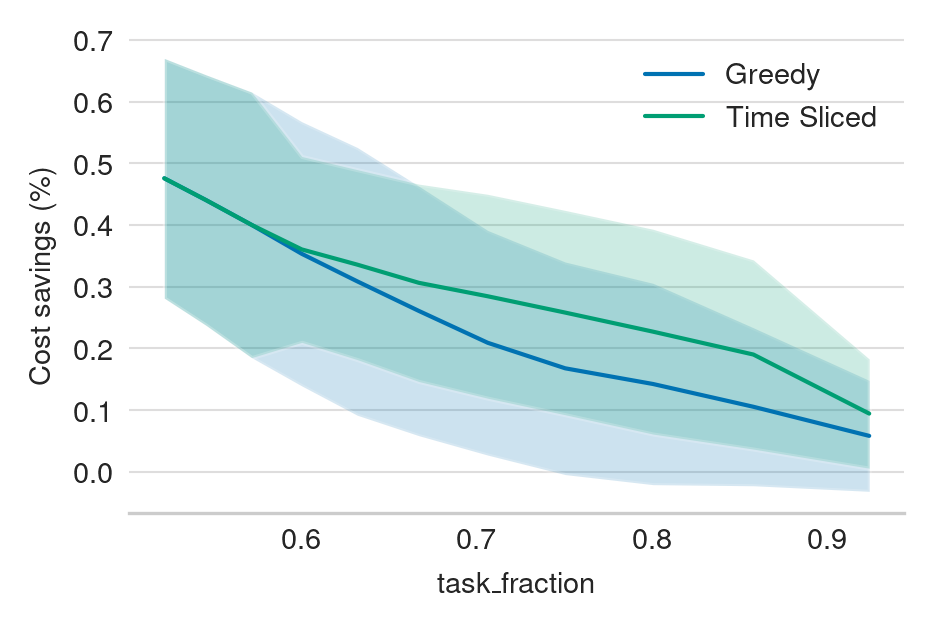

In [36]:
on_demand_df = df[df['strategy'] == 'on_demand']

def plot_mean_cost(ax, plot_df, env, strategy_name):
    plot_df = plot_df[plot_df['env'].str.contains(env)]
    on_demand_cost = on_demand_df[on_demand_df['env'].str.contains(env)][['env', 'cost']]
    plot_df = pd.merge(plot_df, on_demand_cost, on='env', suffixes=('', '_on_demand'))
    mean_df = plot_df.groupby('deadline_hours').mean().reset_index()
    mean_df['cost'] = 1 - mean_df['cost'] / mean_df['cost_on_demand']
    std_df = plot_df.groupby('deadline_hours').std().reset_index()
    std_df['cost'] = std_df['cost'] / mean_df['cost_on_demand']
    sns.lineplot(
        data=mean_df,
        x='task_fraction',
        y='cost',
        label=strategy_name,
        ax=ax,
    )
    ax.fill_between(mean_df['task_fraction'], mean_df['cost'] - std_df['cost'], mean_df['cost'] + std_df['cost'], alpha=0.2)
    ax.set_ylabel('Cost savings (\%)')


env_paths = ['us-west-2b_v100_1']
fig =  plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_subplot(111)
for i, env in enumerate(env_paths):
    plot_mean_cost(ax, greedy_df, env, 'Greedy')
    # plot_mean_cost(ax, limit_deficit_df, env, 'Limited Deficit')
    # plot_mean_cost(ax, best_sliced_df, env, 'Time Sliced (Best per trace)')
    # plot_mean_cost(ax, optimal_df, env, 'Optimal')
    plot_mean_cost(ax, best_sliced_by_env, env, 'Time Sliced')


/tmp/ipykernel_15034/88511726.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = plot_df.groupby(['strategy', 'deadline_hours']).mean().reset_index()


best_slice [nan 10.  8.]
[-0.2, 0.8, 0.2, 1.2]
[29.47664277665082, 18.464250920291438, 39.24779002328913, 24.928968785215254]
0.13333333333333336 -0.13333333333333336 34.97664277665082 45.24779002328913 33\% gray
39.24779002328913
1.1333333333333333 0.8666666666666666 23.964250920291438 30.928968785215254 35\% gray
24.928968785215254


/tmp/ipykernel_15034/88511726.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = plot_df.groupby(['strategy', 'deadline_hours']).mean().reset_index()


best_slice [nan  3. 10.]
[-0.2, 0.8, 0.2, 1.2]
[14.23104924498525, 5.825492524979259, 22.71048591390583, 9.43687145969493]
0.13333333333333336 -0.13333333333333336 19.73104924498525 28.71048591390583 60\% gray
22.71048591390583
1.1333333333333333 0.8666666666666666 11.325492524979259 15.43687145969493 62\% gray
9.43687145969493


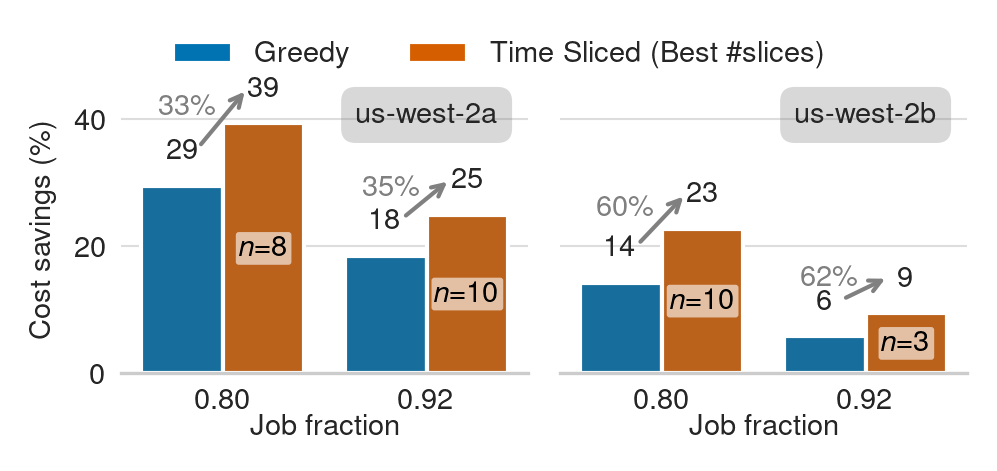

In [51]:
import utils
DDLs = [52, 60]
on_demand_df = df[df['strategy'] == 'on_demand']
palette = sns.color_palette("colorblind", n_colors=10)
palette = [palette[0], palette[3], palette[1], palette[6]]

def plot_mean_cost_bar(ax, plot_df, env, strategies):
    plot_df = plot_df[plot_df['env'].str.contains(env)]
    match_ddls = np.logical_or(*[np.isclose(plot_df['deadline_hours'], ddl) for ddl in DDLs])
    plot_df = plot_df[match_ddls]
    plot_df = plot_df[plot_df['strategy'].isin(strategies)]

    on_demand_cost = on_demand_df[on_demand_df['env'].str.contains(env)][['env', 'cost']]
    plot_df = pd.merge(plot_df, on_demand_cost, on='env', suffixes=('', '_on_demand'))
    plot_df.sort_values(by=['strategy', 'deadline_hours'], inplace=True)
    mean_df = plot_df.groupby(['strategy', 'deadline_hours']).mean().reset_index()
    mean_df['cost'] = (1 - mean_df['cost'] / mean_df['cost_on_demand']) * 100
    sns.barplot(
        data=mean_df,
        x='task_fraction',
        y='cost',
        hue='strategy',
        ax=ax,
        palette=palette,
    )
    print('best_slice', plot_df['num_slices'].unique())
    # ax.errorbar(x=mean_df['task_fraction'], y=mean_df['cost'], yerr=np.vstack([p25_df['cost'], p75_df['cost']]), fmt='none', ecolor='black', capsize=2, alpha=.3)
    ax.set_xticklabels(['{:.2f}'.format(x) for x in mean_df['task_fraction'].sort_values(ascending=True).unique()])
    ax.set_ylabel('')
    ax.legend().set_visible(False)
    utils.add_bar_annotations(ax, None)
    env_name, device, count = env.split('_')
    ax.set_xlabel(f'Job fraction',
                  labelpad=-.2,
                  y=-.2)
    ax.text(.75,
            .85,
            f'{env_name}',
            # f'{count}x{device.upper()}\n{env_name}',
            ha='center',
            va='bottom',
            fontsize=7,
            transform=ax.transAxes,
            bbox=dict(facecolor='gray',
                      alpha=0.3,
                      edgecolor='none',
                      boxstyle='round,pad=0.5'))

    # Find the bar positions and heights
    bar_positions = []
    bar_heights = []
    for patch in ax.patches:
        width = patch.get_width()
        bar_positions.append(patch.get_x() + patch.get_width() / 2)
        bar_heights.append(patch.get_height())
    print(bar_positions)
    print(bar_heights)

    # Iterate through pairs of bars and add arrows and annotations
    max_y = 0
    for i in range(0, len(bar_positions)//2):
        x1, x2 = bar_positions[i], bar_positions[i + 2]
        x = (x1 + x2) / 2
        y1, y2 = bar_heights[i], bar_heights[i + 2]

        percentage = ((y2 - y1) / y1) * 100
        text = f'{percentage:.0f}\%'
        shift = 5
        utils.add_arrow_and_annotation(ax,  x+width/2 - width /6, x - width / 2 + width / 6,
                                       width/4, y1 + shift * 1.1,
                                       y2 + shift*1.2, text, 'gray')
        print(y2)
        num_slices = mean_df[np.isclose(mean_df['cost'], y2)]['num_slices']
        ax.text(x2, y2 / 2, f'$n$={num_slices.values[0]:.0f}', ha='center', va='center', color='black',  bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.1'))
        max_y = max(max_y, y2 + shift*1.2)
    return max_y


env_paths = ['us-west-2a_v100_1', 'us-west-2b_v100_1']
strategies = ['Greedy', 'Time Sliced (Best \#slices)']
fig =  plt.figure(figsize=(fig_width, fig_height - .65), dpi=300)
axes = fig.subplots(1, len(env_paths), sharey=True)
plot_df = pd.concat([greedy_df, best_sliced_by_env], ignore_index=True)
max_y = 0
for i, env in enumerate(env_paths):
    ax = axes[i]
    y = plot_mean_cost_bar(ax, plot_df, env, ['strawman', 'time_sliced_by_num'])
    max_y = max(max_y, y)

axes[0].set_ylim(0, max_y)

axes[0].set_ylabel('Cost savings (\%)')

# Create custom legend elements
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=palette[i], edgecolor=None, label=strategies[i])
    for i in range(len(strategies))
]

# # Add the global legend
fig.legend(handles=legend_elements,
           title='',
           loc='upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.08))

fig.tight_layout()
fig.savefig('figures/greedy_vs_time_sliced.pdf', bbox_inches='tight', pad_inches=0.0)

In [38]:
merged = pd.merge(limit_deficit_df, best_sliced_df, on=['trace', 'deadline_hours', 'task_fraction'], suffixes=('_greedy', '_sliced'))

merged['cost_diff'] = merged['cost_greedy'] - merged['cost_sliced']
merged['cost_diff_percent'] = merged['cost_diff'] / merged['cost_greedy'] * 100

<Axes: ylabel='cost_diff_percent'>

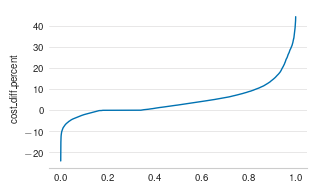

In [39]:
import seaborn as sns
import numpy as np

merged = merged.sort_values('cost_diff_percent')

sns.lineplot(x=np.arange(len(merged)) / len(merged), y=merged['cost_diff_percent'])